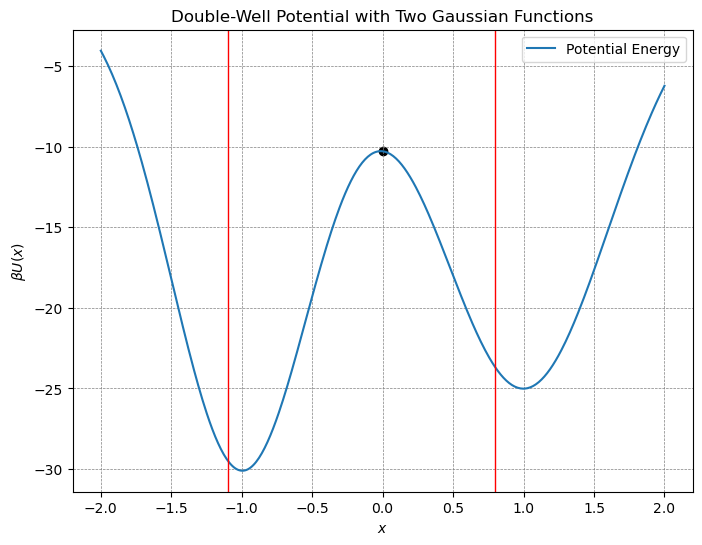

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.integrate import quad
from scipy.interpolate import interp1d, PchipInterpolator, CubicSpline

# Define the double-well potential using two Gaussian functions
def double_gaussian_potential(x, A1=30, mu1=-1, sigma1=0.5, A2=25, mu2=1, sigma2=0.6):
    V1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    V2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    return -(V1 + V2)
beta_U = double_gaussian_potential

D0 = 0.01
def D(x):
    # return D0*x**(2/3)
    return D0*x**0
x = np.linspace(-2, 2, 400)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(x, beta_U(x), label='Potential Energy')
plt.title('Double-Well Potential with Two Gaussian Functions')
plt.xlabel('$x$')
plt.ylabel(r'$\beta U(x)$')
# plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0.8, color='red',linewidth=1)
plt.axvline(-1.1, color='red',linewidth=1)
plt.scatter(0, beta_U(0), color='black')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [2]:
a = 0.1   # location of Injecting point
b1 = -1.1  # location of lower absorbing boundary
b2 = 1.1   # location of upper absorbing boundary
h = 0.01
N = int((b2-b1)/h+1)
x_arr = np.linspace(b1, b2, N)
re_inject_idx = np.where(np.round(x_arr, decimals=10) == a)[0][0]

N1 = int((a-b1)/h+1)
N2 = int((b2-a)/h+1)
x1_arr = np.linspace(b1, a, N1)
x2_arr = np.linspace(a, b2, N2)

In [3]:
from transfer_matrix_recycle import TransferMatrix_AbInAb
from transfer_matrix_reptile import TransferMatrix_InReAb, TransferMatrix_AbReIn

aia_trans = TransferMatrix_AbInAb(h, x_arr, beta_U, recycle_idx=re_inject_idx, criteria=0)

ari1_trans = TransferMatrix_AbReIn(h, x1_arr, beta_U, 0)
ira2_trans = TransferMatrix_InReAb(h, x2_arr, beta_U, 0)

from mfpt_Pst_RW_2subset_simu import simulate_AbInAb_regular

num_particles = 2000
init_position = a
hx = h
ht = hx**2/(2*D0)
n_arr = np.arange(b1, b2+h/2, h)
n_arr = np.round(n_arr, decimals=8)

In [4]:
%%time

count_left, count_right, ti_left, ti_right = simulate_AbInAb_regular(init_point=init_position, num_particles=num_particles, beta_U=beta_U, n_arr=n_arr, b1=b1, b2=b2, hx=hx)

1 right
2 right
3 right
4 right
5 right
6 right
7 right
1 left
8 right
9 right
10 right
11 right
12 right
13 right
14 right
2 left
15 right
16 right
17 right
18 right
19 right
20 right
21 right
22 right
23 right
24 right
25 right
3 left
26 right
4 left
27 right
28 right
29 right
30 right
31 right
32 right
33 right
5 left
34 right
6 left
35 right
7 left
36 right
37 right
38 right
39 right
40 right
41 right
42 right
43 right
8 left
44 right
9 left
10 left
11 left
45 right
46 right
47 right
48 right
49 right
50 right
51 right
52 right
53 right
54 right
55 right
56 right
57 right
58 right
59 right
60 right
61 right
62 right
63 right
64 right
12 left
65 right
66 right
67 right
68 right
69 right
70 right
71 right
72 right
73 right
74 right
75 right
76 right
77 right
78 right
13 left
79 right
80 right
81 right
14 left
15 left
82 right
83 right
84 right
85 right
86 right
87 right
88 right
89 right
90 right
16 left
91 right
92 right
93 right
94 right
17 left
95 right
96 right
97 right
98 right


In [5]:
# np.save('data/count_n_high', count_n)
# np.save('data/ti_n_high', ti_n)

2062.0 9658.0


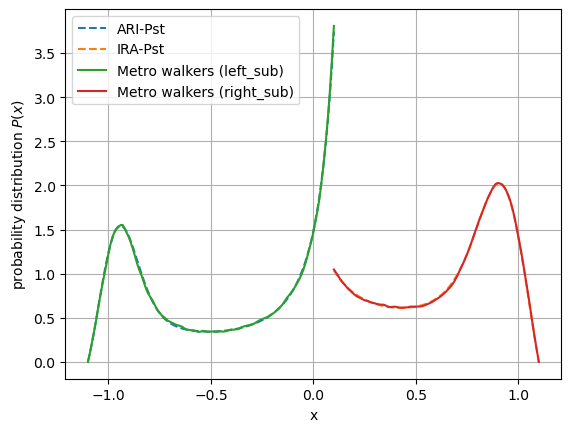

In [6]:
ari1_trans.steady_state[0] = 0
ira2_trans.steady_state[-1] = 0
ari1_trans.steady_state = ari1_trans.steady_state/(h*np.sum(ari1_trans.steady_state))
ira2_trans.steady_state = ira2_trans.steady_state/(h*np.sum(ira2_trans.steady_state))
plt.plot(x1_arr, ari1_trans.steady_state, '--', label="ARI-Pst")
plt.plot(x2_arr, ira2_trans.steady_state, '--', label="IRA-Pst")

n1_arr = n_arr[:N1]
n2_arr = n_arr[N1-1:]
count_n1 = np.sum(count_left, axis=0)
count_n2 = np.sum(count_right, axis=0)
print(count_n1[0], count_n2[-1])

count_n1[0] = 0
count_n2[-1] = 0
Pst_n1 = count_n1/(h*np.sum(count_n1))
Pst_n2 = count_n2/(h*np.sum(count_n2))
plt.plot(n1_arr, Pst_n1, label="Metro walkers (left_sub)")
plt.plot(n2_arr, Pst_n2, label="Metro walkers (right_sub)")

plt.xlabel('x')
plt.ylabel("probability distribution $P(x)$")
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_Pst.pdf", format='pdf')
# 3671.0 1041.0

In [7]:
Pst_n1-ari1_trans.steady_state

array([ 0.        ,  0.00186763,  0.00014314, -0.00224926, -0.00207835,
        0.00185954,  0.00019886, -0.01090468, -0.02287399, -0.02502789,
       -0.01271417,  0.00069759,  0.00623907,  0.00437127, -0.00465323,
       -0.00672184,  0.00669523,  0.01637717, -0.00206093, -0.01115861,
       -0.00643282, -0.01544359, -0.01969611, -0.02843102, -0.03867198,
       -0.03610282, -0.01878969, -0.01807049, -0.02387169, -0.02230692,
       -0.00800204,  0.00797036,  0.01331934,  0.00589459,  0.00175415,
        0.00417925,  0.00479607,  0.00991946,  0.01336007,  0.00985935,
        0.01509196,  0.01725361,  0.01811839,  0.01825366,  0.02070559,
        0.02132902,  0.0198899 ,  0.00889927,  0.00097428,  0.00245012,
        0.00285844,  0.00362356,  0.0037176 , -0.00257154, -0.00749202,
       -0.00288407,  0.00706306,  0.0059502 , -0.00012675, -0.00189738,
        0.00037181,  0.00083875, -0.00297882, -0.0054131 , -0.0025715 ,
       -0.00355148, -0.00883954, -0.00807734, -0.0048867 ,  0.00

/tmp/ipykernel_800384/3554627992.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(Pst_n1), label='Metro walkers (left_sub)')
/tmp/ipykernel_800384/3554627992.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(Pst_n2), label='Metro walkers (right_sub)')
/tmp/ipykernel_800384/3554627992.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(ari1_trans.steady_state),'--', label="ARI-Pst")
/tmp/ipykernel_800384/3554627992.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(ira2_trans.steady_state), '--', label="IRA-Pst")


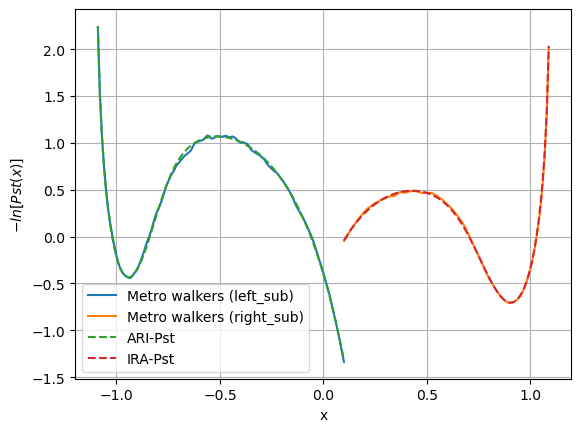

In [9]:
plt.plot(x1_arr, -np.log(Pst_n1), label='Metro walkers (left_sub)')
plt.plot(x2_arr, -np.log(Pst_n2), label='Metro walkers (right_sub)')
plt.plot(x1_arr, -np.log(ari1_trans.steady_state),'--', label="ARI-Pst")
plt.plot(x2_arr, -np.log(ira2_trans.steady_state), '--', label="IRA-Pst")
plt.xlabel('x')
plt.ylabel("$-ln[Pst(x)]$")
plt.grid()
plt.legend()

[-9.78883051e-02 -6.72863080e-02 -5.38282268e-02 -2.78682374e-02
 -6.04539982e-02 -3.66992922e-02 -1.92119160e-02 -1.51800374e-02
 -4.02142202e-02 -5.90105534e-02 -6.40115066e-02 -4.27198769e-02
 -5.08237548e-02 -4.02689363e-02 -4.25182265e-02 -3.99158657e-02
 -4.19504759e-02 -5.09038167e-02 -4.57715156e-02 -5.05996347e-02
 -4.63999929e-02 -5.05162860e-02 -4.46312737e-02 -4.77920772e-02
 -4.54960586e-02 -4.43085011e-02 -4.35129266e-02 -4.22105281e-02
 -3.79113041e-02 -4.29577555e-02 -4.37471375e-02 -4.25097350e-02
 -3.97347799e-02 -4.11625030e-02 -4.12385101e-02 -3.90901101e-02
 -3.76113848e-02 -4.05696901e-02 -4.41593757e-02 -4.27408295e-02
 -4.71620237e-02 -4.41664358e-02 -4.54300113e-02 -4.89453990e-02
 -5.19459844e-02 -4.81194722e-02 -4.79786204e-02 -4.60384897e-02
 -4.75281392e-02 -4.58710030e-02 -4.66468461e-02 -4.61172524e-02
 -4.34853524e-02 -4.32452650e-02 -4.19616959e-02 -4.08885146e-02
 -4.35339664e-02 -4.05294500e-02 -3.98110651e-02 -3.67962724e-02
 -3.75672920e-02 -3.47581

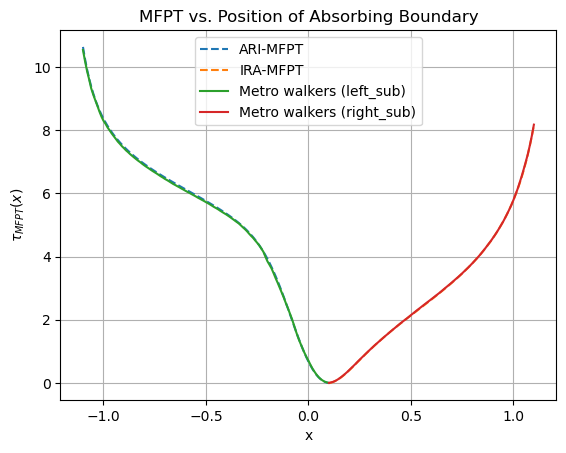

In [10]:
def mfpt_matrix(transMat_instance):
    ria_trans = transMat_instance
    ria_P = ria_trans.trans_mat.T
    idx_fixed_vect = np.where(np.round(ria_trans.eig6_w.real, decimals=10) == 1)[0][0]
    vec_pi = ria_trans.eig6_v[:,idx_fixed_vect].real/np.sum(ria_trans.eig6_v[:,idx_fixed_vect].real)
    N = vec_pi.size
    epsilon = np.ones(N)
    mat_I = np.eye(N)
    mat_E = np.ones((N, N))
    mat_Z = np.linalg.inv(mat_I-ria_P+np.outer(epsilon, vec_pi))
    vec_Zdg = np.diag(mat_Z)
    mat_Zdg = np.diag(vec_Zdg)
    mat_Mdg = np.diag(1/vec_pi)
    mat_M = (mat_I - mat_Z + mat_E @ mat_Zdg) @ mat_Mdg
    mat_Mbar = mat_M - mat_Mdg
    return mat_Mbar

m1_bar = mfpt_matrix(ari1_trans)
m2_bar = mfpt_matrix(ira2_trans)
delt_t = h**2/(2*D0)
plt.plot(x1_arr, delt_t*m1_bar[-1], '--', label="ARI-MFPT")
plt.plot(x2_arr, delt_t*m2_bar[0], '--', label="IRA-MFPT")

# Convert ti_left to float type
ti_left = ti_left.astype(float)
# Replace 0 elements with NaN
ti_left[ti_left == 0] = np.nan
ti_left[:, -1] = 0

# Convert ti_left to float type
ti_right = ti_right.astype(float)
# Replace 0 elements with NaN
ti_right[ti_right == 0] = np.nan
ti_right[:, 0] = 0

mfpt1_simu_arr = ht*np.nanmean(ti_left, axis=0)
mfpt2_simu_arr = ht*np.nanmean(ti_right, axis=0)

plt.plot(n1_arr, mfpt1_simu_arr, label="Metro walkers (left_sub)")
plt.plot(n2_arr, mfpt2_simu_arr, label="Metro walkers (right_sub)")

plt.xlabel('x')
plt.ylabel(r"$\tau_{MFPT} (x)$")
plt.title('MFPT vs. Position of Absorbing Boundary')
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_MFPT.pdf", format='pdf')

print(mfpt1_simu_arr-delt_t*m1_bar[-1])


### Define Functions for Reconstructing Free Energy with MFPT and steady state distribution

In [11]:
def reconstruct_energy_ra(x_arr, Pst_arr, mfpt_arr):
    # Pst_arr[-1] = 0
    interp_Pst_func = CubicSpline(x_arr, np.array(Pst_arr, dtype=float))
    N = x_arr.size
    # Except for the absorbing boundary Pst(b) = 0, D(x)=0, also avoid at reflecting boundary A(x)=0, B(x)=0
    Bx_arr = np.zeros(N-2)
    integral_Pst_arr = np.zeros(N-2)
    for i in range(N-2):
        integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[1+i], x_arr[-1])
        Bx_arr[i] = -1.0/interp_Pst_func(x_arr[1+i])*(integral_Pst_arr[i]-(mfpt_arr[-1]-mfpt_arr[1+i])/mfpt_arr[-1])

    interp_invertBx_func = CubicSpline(x_arr[1:-1], 1.0/Bx_arr)
    integral_invertBx_arr = np.zeros(N-2)
    beta_Grec2_arr = np.zeros(N-2)
    for i in range(N-2):
        # Here x0 is x_arr[1]
        integral_invertBx_arr[i], _ = quad(interp_invertBx_func, x_arr[1], x_arr[1+i])
        beta_Grec2_arr[i] = beta_U(x_arr[1])+np.log(Bx_arr[i]/Bx_arr[0])-integral_invertBx_arr[i]
    return beta_Grec2_arr

def reconstruct_energy_ar(x_arr, Pst_arr, mfpt_arr):
    # Pst_arr[0] = 0
    interp_Pst_func = CubicSpline(x_arr, np.array(Pst_arr, dtype=float))
    N = x_arr.size
    # Except for the absorbing boundary Pst(b) = 0, D(x)=0, also avoid at reflecting boundary A(x)=0, B(x)=0
    Bx_arr = np.zeros(N-2)
    integral_Pst_arr = np.zeros(N-2)
    for i in range(N-2):
        integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[0], x_arr[1+i])
        Bx_arr[i] = -1.0/interp_Pst_func(x_arr[1+i])*(integral_Pst_arr[i]+(mfpt_arr[1+i]-mfpt_arr[0])/mfpt_arr[0])

    interp_invertBx_func = CubicSpline(x_arr[1:-1], 1.0/Bx_arr)
    integral_invertBx_arr = np.zeros(N-2)
    beta_Grec2_arr = np.zeros(N-2)
    for i in range(N-2):
        # Here x0 is x_arr[1]
        integral_invertBx_arr[i], _ = quad(interp_invertBx_func, x_arr[1+i], x_arr[-2])
        beta_Grec2_arr[i] = beta_U(x_arr[-2])+np.log(Bx_arr[i]/Bx_arr[-1])-integral_invertBx_arr[i]
    return beta_Grec2_arr

### Reconstruction Using data [mfpt (mfpt1_simu_arr), Pst (Pst_n)] extracted from simulation

/tmp/ipykernel_800384/2877723197.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[0], x_arr[1+i])
/tmp/ipykernel_800384/2877723197.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the 

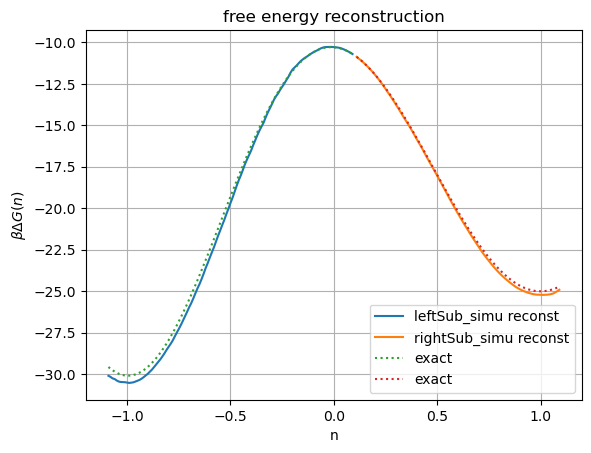

In [20]:
# np.append(delt_t*m1_bar[-1][0], mfpt1_simu_arr[1:])
beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=Pst_n1, mfpt_arr=mfpt1_simu_arr)
beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=Pst_n2, mfpt_arr=mfpt2_simu_arr)
# beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=Pst_n1, mfpt_arr=m1_bar[-1])
# beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=Pst_n2, mfpt_arr=m2_bar[0])
# beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=ari1_trans.steady_state, mfpt_arr=mfpt1_simu_arr)
# beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=ira2_trans.steady_state, mfpt_arr=mfpt2_simu_arr)
# print(Pst_n1[0], Pst_n2[-1], hx*np.sum(Pst_n1), hx*np.sum(Pst_n2))
plt.plot(n1_arr[1:-1], beta_Grec2_arr1, label="leftSub_simu reconst")
plt.plot(n2_arr[1:-1], beta_Grec2_arr2, label="rightSub_simu reconst")
plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_reconstruction.pdf", format='pdf')

1 particle: 2013.0 9615.0
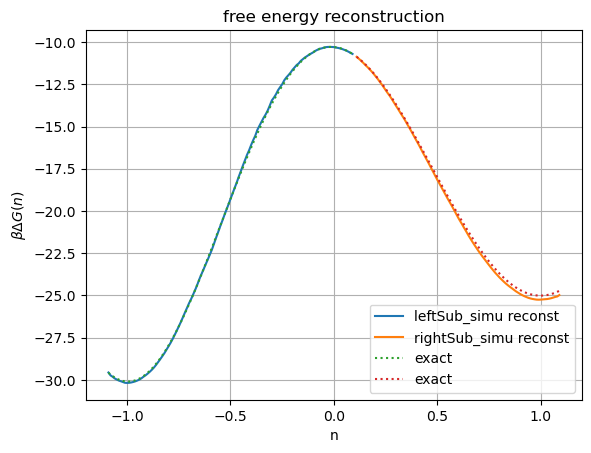

1 particle: 2057.0 9303.0
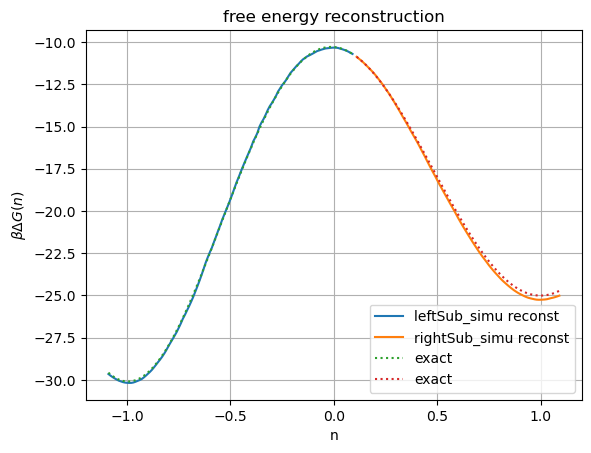

1 particle: 2008.0 9263.0
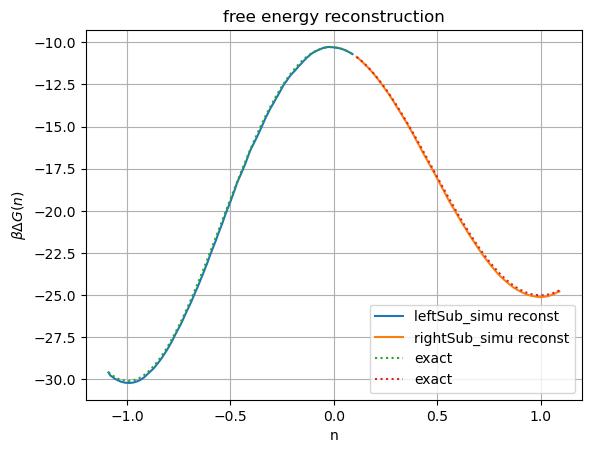

1 particle: 972.0 4693.0
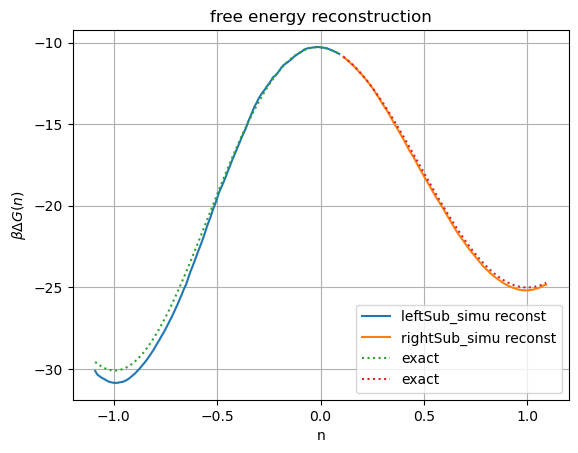

1 particle: 1026.0 4781.0
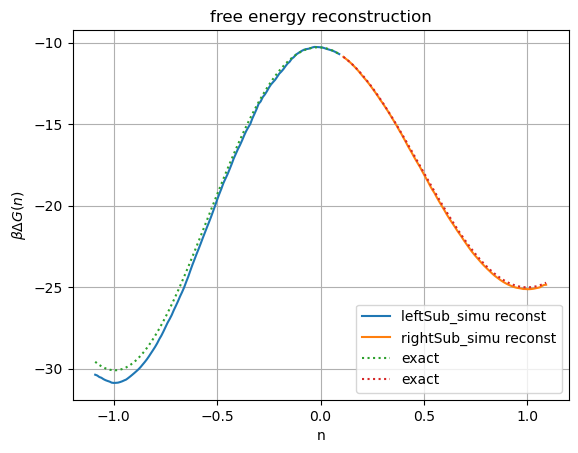

1 particle:1002.0 4680.0
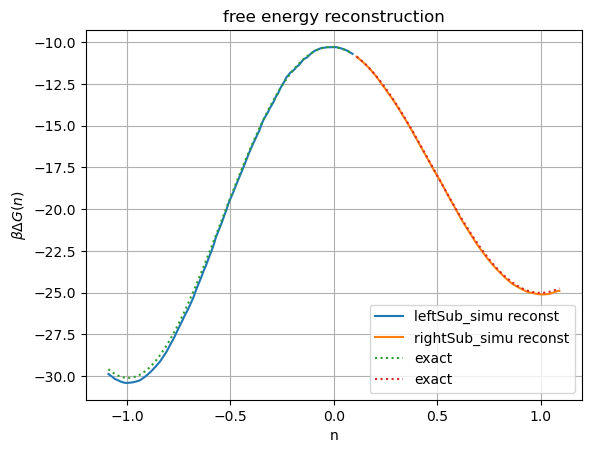

7885.0 36887.0
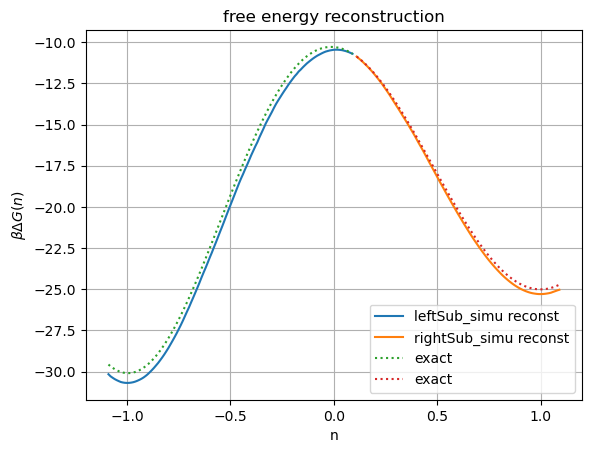

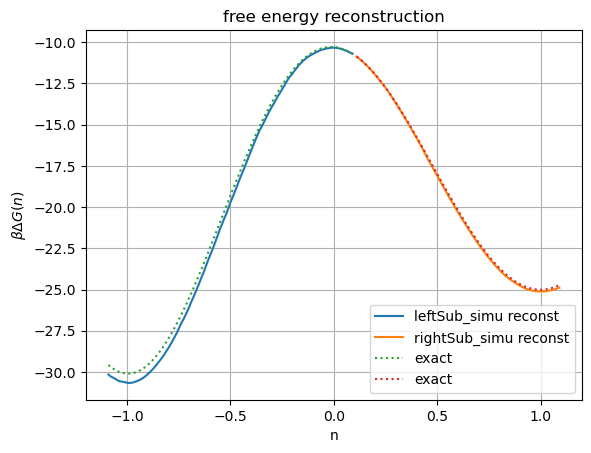

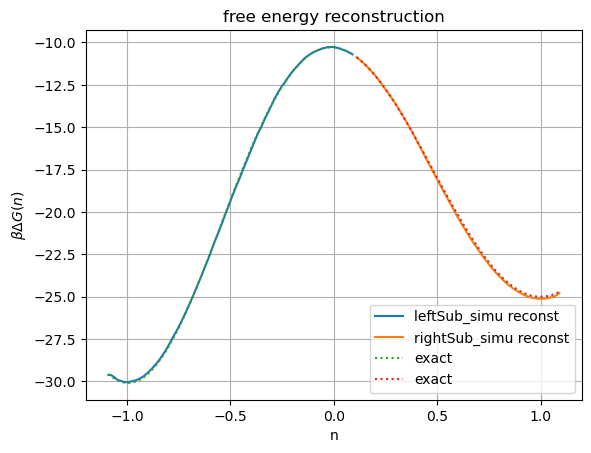

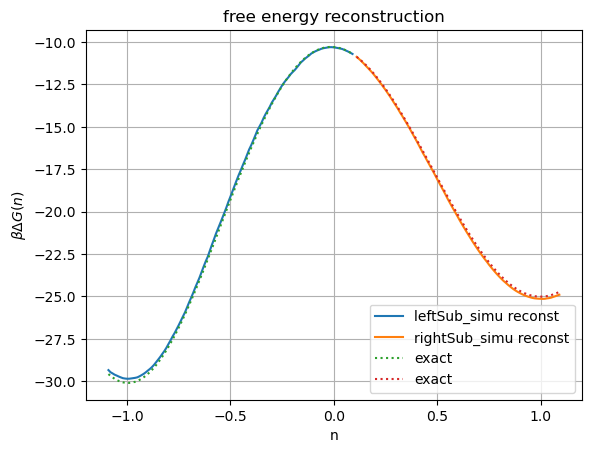

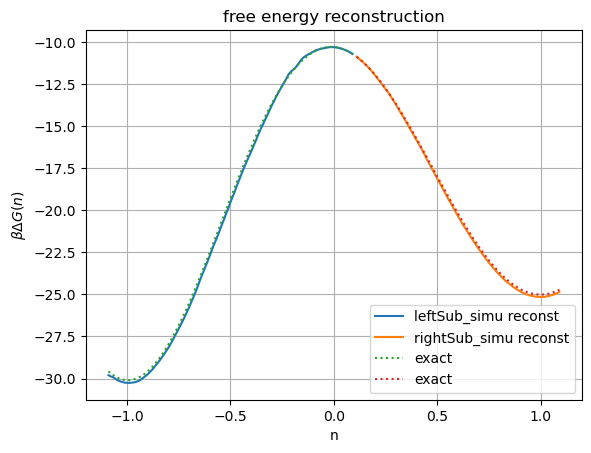

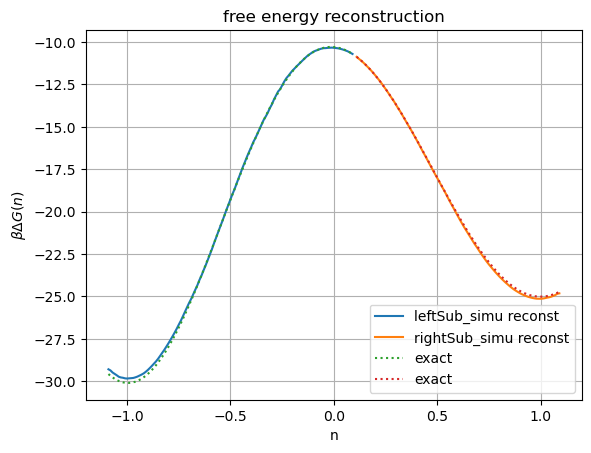

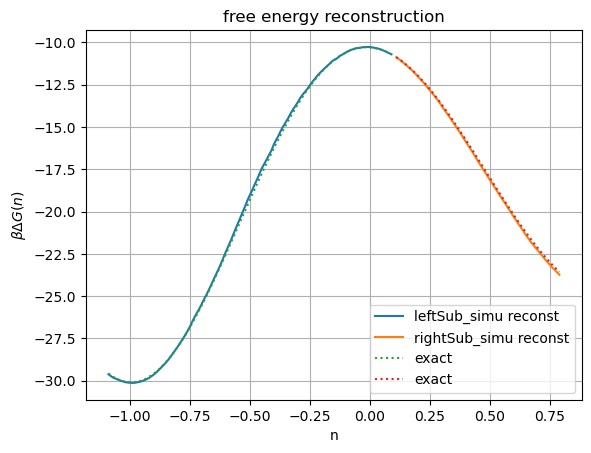

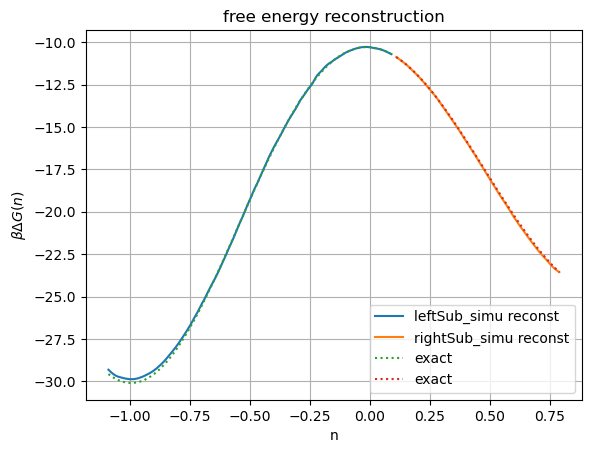

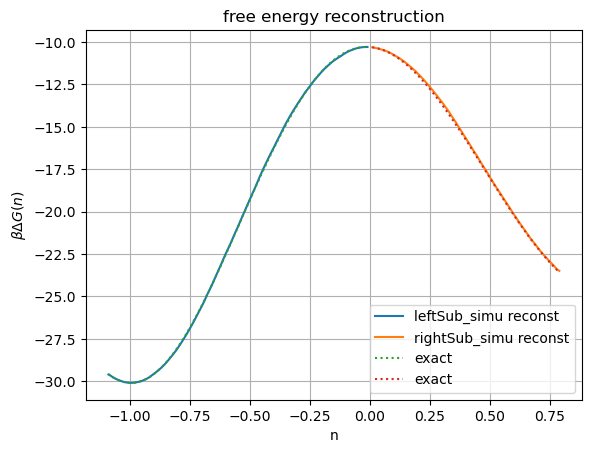

### Reconstruction Using data [mfpt matrix (mat_Mbar[i]), Pst (ria_trans.steady_state)] calculated by Transfer Matrix

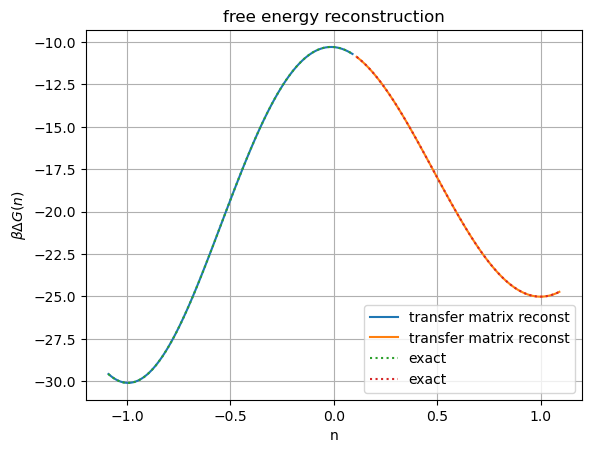

In [13]:
beta_Grec2_arr1 = reconstruct_energy_ar(x1_arr, Pst_arr=ari1_trans.steady_state, mfpt_arr=m1_bar[-1])
beta_Grec2_arr2 = reconstruct_energy_ra(x2_arr, Pst_arr=ira2_trans.steady_state, mfpt_arr=m2_bar[0])

plt.plot(x1_arr[1:-1], beta_Grec2_arr1, label="transfer matrix reconst")
plt.plot(x2_arr[1:-1], beta_Grec2_arr2, label="transfer matrix reconst")

plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()